<a href="https://colab.research.google.com/github/varnikaaavyas/-/blob/master/TSA_5_Dart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://unit8co.github.io/darts/

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46

In [ ]:
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv")
print(df)

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


# darts.models import ExponentialSmoothing

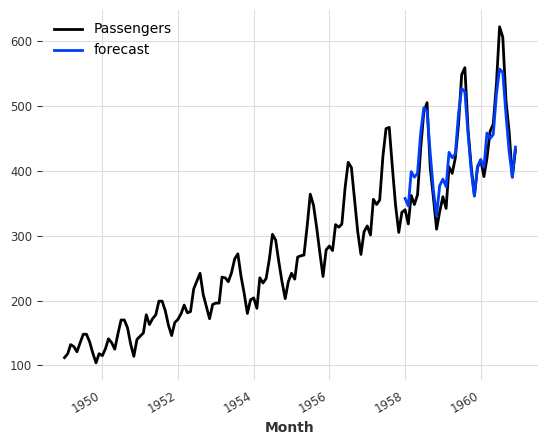

In [ ]:
# training and predicting model
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

# plot
series.plot()
prediction.plot(label="forecast")
plt.legend()

# darts.models import NaiveSeasonal()
For example, the NaiveSeasonal(K) model always “repeats” the value that occurred K time steps ago.

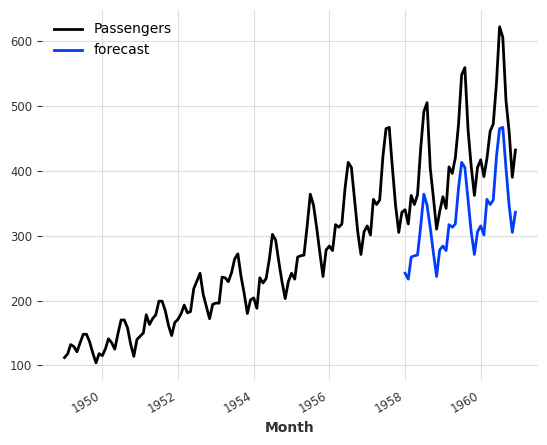

In [ ]:
# training and predicting model
from darts.models import NaiveSeasonal

model = NaiveSeasonal(K=36) #repeat the k Value
model.fit(train)
prediction = model.predict(36)

# plot
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

# darts.models import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqzfj1lme/0d6qz3s3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqzfj1lme/zv8pq64x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31476', 'data', 'file=/tmp/tmpqzfj1lme/0d6qz3s3.json', 'init=/tmp/tmpqzfj1lme/zv8pq64x.json', 'output', 'file=/tmp/tmpqzfj1lme/prophet_model3ogdm12g/prophet_model-20230424032313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:23:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


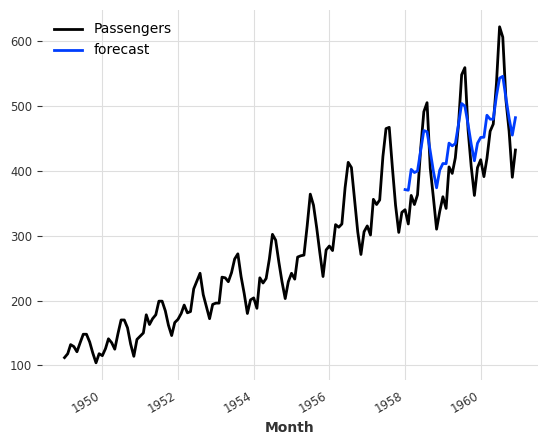

In [ ]:
# training and predicting model
from darts.models import Prophet

model = Prophet() #repeat the k Value
model.fit(train)
prediction = model.predict(36)

# plot
series.plot()
prediction.plot(label="forecast")
plt.legend()

# darts.models.forecasting.random_forest.RandomForest

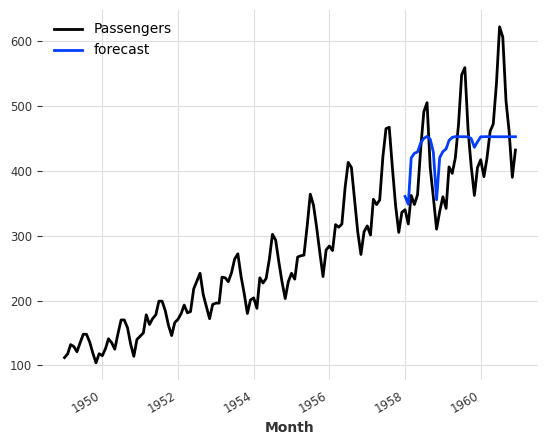

In [ ]:
# training and predicting model
from darts.models import RandomForest

model = RandomForest(lags=36) #repeat the k Value
model.fit(train)
prediction = model.predict(36)

# plot
series.plot()
prediction.plot(label="forecast")
plt.legend()

# darts.models.forecasting.rnn_model.RNNModel

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 49.6 K
4 | V             | Linear           | 26    
---------------------------------------------------
49.6 K    Trainable params
0         Non-trainable params
49.6 K    Total params
0.199     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

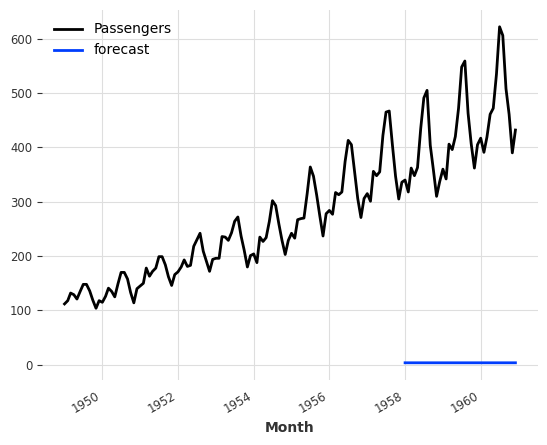

In [ ]:
# training and predicting model
from darts.models import RNNModel

model = RNNModel(input_chunk_length=12, model='LSTM', n_epochs=20,n_rnn_layers=10) # model = LSTM  | RNN | GRU   Gated Recurrent Unit (GRU)
model.fit(train)
prediction = model.predict(36)

# plot
series.plot()
prediction.plot(label="forecast")
plt.legend()

# darts.models.forecasting.xgboost.XGBModel

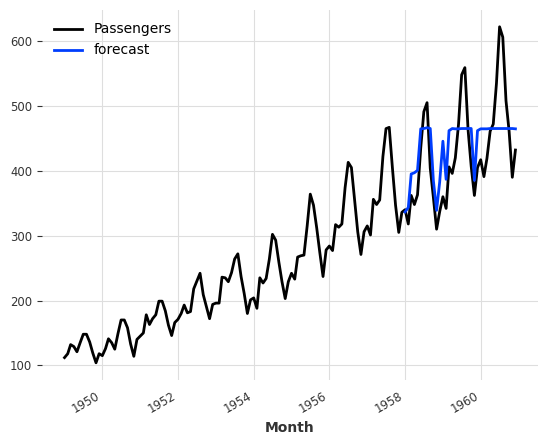

In [ ]:
# training and predicting model
from darts.models import XGBModel

model = XGBModel(lags=36)
model.fit(train)
prediction = model.predict(36)

# plot
series.plot()
prediction.plot(label="forecast")
plt.legend()